This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [9]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.6033 - accuracy: 0.8134 - val_loss: 0.2981 - val_accuracy: 0.9131
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2567 - accuracy: 0.9211 - val_loss: 0.2249 - val_accuracy: 0.9323
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1697 - accuracy: 0.9469 - val_loss: 0.1917 - val_accuracy: 0.9427
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1202 - accuracy: 0.9628 - val_loss: 0.1490 - val_accuracy: 0.9578
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0900 - accuracy: 0.9721 - val_loss: 0.1266 - val_accuracy: 0.9638
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0666 - accuracy: 0.9792 - val_loss: 0.1151 - val_accuracy: 0.9667
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.1295 - val_accuracy: 0.9643
Epoch 

**Plotting a validation accuracy comparison**

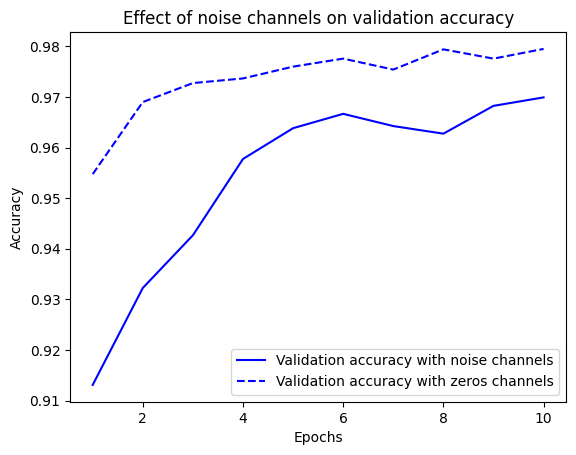

In [11]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3164 - accuracy: 0.1026 - val_loss: 2.3039 - val_accuracy: 0.1022
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2983 - accuracy: 0.1191 - val_loss: 2.3146 - val_accuracy: 0.1060
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2907 - accuracy: 0.1289 - val_loss: 2.3158 - val_accuracy: 0.1009
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2782 - accuracy: 0.1400 - val_loss: 2.3226 - val_accuracy: 0.1050
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2609 - accuracy: 0.1539 - val_loss: 2.3315 - val_accuracy: 0.1058
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2417 - accuracy: 0.1658 - val_loss: 2.3453 - val_accuracy: 0.1064
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2177 - accuracy: 0.1811 - val_loss: 2.3602 - val_accuracy: 0.1058

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [13]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 666.0981 - accuracy: 0.2511 - val_loss: 2.2751 - val_accuracy: 0.1604
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 3.0779 - accuracy: 0.1604 - val_loss: 2.2676 - val_accuracy: 0.1537
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3657 - accuracy: 0.1655 - val_loss: 3.8329 - val_accuracy: 0.1987
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4880 - accuracy: 0.1743 - val_loss: 2.5449 - val_accuracy: 0.1895
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.5013 - accuracy: 0.1729 - val_loss: 2.1466 - val_accuracy: 0.1799
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4714 - accuracy: 0.1784 - val_loss: 2.2066 - val_accuracy: 0.1903
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2713 - accuracy: 0.1891 - val_loss: 2.2440 - val_accuracy: 0.1883
Epoc

**The same model with a more appropriate learning rate**

In [14]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3669 - accuracy: 0.9100 - val_loss: 0.1564 - val_accuracy: 0.9557
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1260 - accuracy: 0.9640 - val_loss: 0.1367 - val_accuracy: 0.9647
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0971 - accuracy: 0.9733 - val_loss: 0.1562 - val_accuracy: 0.9654
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0772 - accuracy: 0.9794 - val_loss: 0.1544 - val_accuracy: 0.9689
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0687 - accuracy: 0.9828 - val_loss: 0.1808 - val_accuracy: 0.9665
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0584 - accuracy: 0.9855 - val_loss: 0.1637 - val_accuracy: 0.9731
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0493 - accuracy: 0.9873 - val_loss: 0.2481 - val_accuracy: 0.9696
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [15]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6796 - accuracy: 0.8269 - val_loss: 0.3603 - val_accuracy: 0.9040
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3533 - accuracy: 0.9030 - val_loss: 0.3118 - val_accuracy: 0.9139
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.9113 - val_loss: 0.2923 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3019 - accuracy: 0.9156 - val_loss: 0.2855 - val_accuracy: 0.9215
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.9182 - val_loss: 0.2791 - val_accuracy: 0.9247
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.9203 - val_loss: 0.2748 - val_accuracy: 0.9239
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2810 - accuracy: 0.9212 - val_loss: 0.2725 - val_accuracy: 0.9252
Epoch 

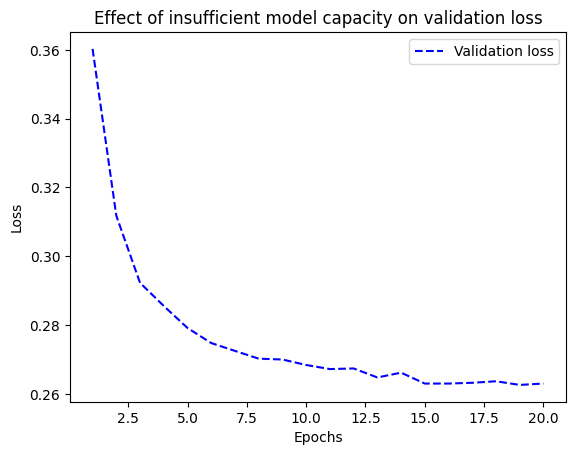

In [16]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [17]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3659 - accuracy: 0.8960 - val_loss: 0.1832 - val_accuracy: 0.9478
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1634 - accuracy: 0.9517 - val_loss: 0.1299 - val_accuracy: 0.9610
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1176 - accuracy: 0.9650 - val_loss: 0.1257 - val_accuracy: 0.9623
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0916 - accuracy: 0.9729 - val_loss: 0.1015 - val_accuracy: 0.9693
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0722 - accuracy: 0.9776 - val_loss: 0.1097 - val_accuracy: 0.9673
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0604 - accuracy: 0.9820 - val_loss: 0.0954 - val_accuracy: 0.9735
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.0905 - val_accuracy: 0.9742
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [18]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 92ms/step - loss: 0.5157 - accuracy: 0.7791 - val_loss: 0.3847 - val_accuracy: 0.8689
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3160 - accuracy: 0.8947 - val_loss: 0.3170 - val_accuracy: 0.8786
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2355 - accuracy: 0.9215 - val_loss: 0.3161 - val_accuracy: 0.8723
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1928 - accuracy: 0.9345 - val_loss: 0.2760 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1619 - accuracy: 0.9461 - val_loss: 0.2858 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1363 - accuracy: 0.9551 - val_loss: 0.2922 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1162 - accurac

**Version of the model with lower capacity**

In [19]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.6114 - accuracy: 0.7308 - val_loss: 0.5361 - val_accuracy: 0.7707
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4657 - accuracy: 0.8613 - val_loss: 0.4299 - val_accuracy: 0.8660
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3682 - accuracy: 0.8974 - val_loss: 0.3661 - val_accuracy: 0.8812
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3010 - accuracy: 0.9147 - val_loss: 0.3295 - val_accuracy: 0.8800
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2525 - accuracy: 0.9249 - val_loss: 0.2998 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2172 - accuracy: 0.9359 - val_loss: 0.2908 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1905 - accuracy: 0.9430 - val_loss: 0.2792 - val_accuracy: 0.8928
Epoch 8/20
30

**Version of the model with higher capacity**

In [20]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 152ms/step - loss: 0.5500 - accuracy: 0.7392 - val_loss: 0.4273 - val_accuracy: 0.8049
Epoch 2/20
30/30 [==============================] - 4s 117ms/step - loss: 0.3094 - accuracy: 0.8729 - val_loss: 0.3795 - val_accuracy: 0.8357
Epoch 3/20
30/30 [==============================] - 3s 114ms/step - loss: 0.2266 - accuracy: 0.9091 - val_loss: 0.2849 - val_accuracy: 0.8814
Epoch 4/20
30/30 [==============================] - 3s 111ms/step - loss: 0.1760 - accuracy: 0.9333 - val_loss: 0.3148 - val_accuracy: 0.8747
Epoch 5/20
30/30 [==============================] - 3s 94ms/step - loss: 0.1295 - accuracy: 0.9508 - val_loss: 0.3151 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 3s 91ms/step - loss: 0.1003 - accuracy: 0.9633 - val_loss: 0.3373 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 3s 94ms/step - loss: 0.0778 - accuracy: 0.9747 - val_loss: 0.3631 - val_accuracy: 0.8863
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [21]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5875 - accuracy: 0.7898 - val_loss: 0.4696 - val_accuracy: 0.8606
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3967 - accuracy: 0.8903 - val_loss: 0.3853 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3256 - accuracy: 0.9170 - val_loss: 0.3821 - val_accuracy: 0.8762
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2913 - accuracy: 0.9272 - val_loss: 0.3659 - val_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2680 - accuracy: 0.9342 - val_loss: 0.3907 - val_accuracy: 0.8735
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2560 - accuracy: 0.9387 - val_loss: 0.4039 - val_accuracy: 0.8698
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2409 - accuracy: 0.9470 - val_loss: 0.3709 - val_accuracy: 0.8836
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [22]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6446 - accuracy: 0.6152 - val_loss: 0.5523 - val_accuracy: 0.8475
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5491 - accuracy: 0.7327 - val_loss: 0.4578 - val_accuracy: 0.8643
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4798 - accuracy: 0.7895 - val_loss: 0.3905 - val_accuracy: 0.8811
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4150 - accuracy: 0.8341 - val_loss: 0.3452 - val_accuracy: 0.8752
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3694 - accuracy: 0.8625 - val_loss: 0.3089 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3250 - accuracy: 0.8850 - val_loss: 0.2967 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2903 - accuracy: 0.9027 - val_loss: 0.2749 - val_accuracy: 0.8919
Epoch 8/20
30

## Summary